<a href="https://colab.research.google.com/github/yosephhabtu/MC-DATA-201-Project-3/blob/main/DATA_201_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Decision Tree for Classification
## 1. Introduction
##      The Project is the final of the three projects required to complete  
##      DATA201 course. We will handle the project as a team namely:
### a. Adi Verma
### b. Assefa Dinsa
### c. Xutong Zhang
### d. Yoseph Habtu

## 2.  Purpose of the Project:
## 2.1 Identify appropriate dataset and import it.
## 2.2 Carry out Exploratory Data Analysis.
## 2.3 Apply Decision Tree model and reach conclussion

## 3. Source of the dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset (original data source is unknown)





## Background Information

According to the World Stroke Organization, stroke is the second-leading cause of death in the world, accounting for 6.5 million deaths every year (Feigin et al.).

### Definition and Types of Stroke

A stroke happens when there is a blockage of blood supply to the brain, which can contribute to long-lasting brain damage, disability, and death. There are two main types of stroke, with the most common being ischemic strokes, which occurs when blood clots or plaque block blood vessels to the brain ("About Stroke"). The second most common type is the hemmorrhagic stroke, which occurs when an artery in the brain leaks or ruptures.

### Risk Factors

The National Heart, Lung, and Blood Institute states that 82% to 90% of all strokes can be attributed to factors we can control ("Causes and Risk Factors"). Such lifestyle factors include:

*   Physical inactivity
*   Poor diet
*   Smoking
*   Heavy drinking
*   Stress

Some medical factors listed by Mayo Clinic include:

*   High blood pressure
*   High cholesterol
*   Diabetes
*   Cardiovascular disease, including heart failure, heart defects, heart infection, etc.
*   Personal or family history of stroke or related disease


Other notable risk factors of stroke are **age**, as individuals at age 55 or older have a higher risk of stroke than younger people do, **race/ethnicity**, as stroke occurs most often in African American and Hispanic adults, and **sex**, with men having a higher risk than women ("Stroke").

### References

“About Stroke.” *Centers for Disease Control and Prevention*, Centers for Disease Control and Prevention, 4 May 2023, www.cdc.gov/stroke/about.htm#Ischemic.

“Causes and Risk Factors.” *National Heart Lung and Blood Institute*, U.S. Department of Health and Human Services, www.nhlbi.nih.gov/health/stroke/causes.

Feigin, Valery L, et al. “World Stroke Organization (WSO): Global stroke fact sheet 2022.” *International Journal of Stroke*, vol. 17, no. 1, Jan. 2022, pp. 18-29, https://doi.org/10.1177/17474930211065917.

“Stroke.” *Mayo Clinic*, Mayo Foundation for Medical Education and Research, 30 Apr. 2024, www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113#:~:text=An%20ischemic%20stroke%20occurs%20when%20a%20blood%20clot%2C%20known%20as,of%20plaques%2C%20known%20as%20atherosclerosis.

In [1]:
# 4. Load Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# 5. Import Dataset:
df = pd.read_csv('https://raw.githubusercontent.com/yosephhabtu/MC-DATA-201-Project-3/main/healthcare-dataset-stroke-data.csv')

# 6. View pertinent information about the DataFrame:
# 6.1 View the First Five Lines of the DataFrame

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
# 6.2 View the Last Five Lines of the DataFrame:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [3]:
# 6.3 View Column Details:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# 6.4 Information on Missing Values:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# 6.5 Out come after dropping the Missing values:
df = df.dropna()
df.shape

(4909, 12)

## Note:
## 5110 rows by 12 Columns before dropping the missing values
## 4909 rows by 12 Columns after droping the missing values

Data Exploration Visualizations

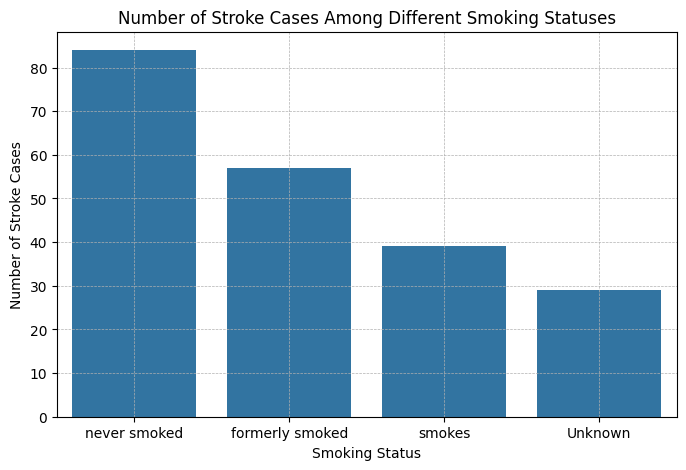

In [6]:
# Visualization 1: Bar Chart - Number of Stroke Cases Among Different Smoking Statuses
# compare strokes of smokers, former smokers, and non-smokers.
df_cleaned = df.dropna()
smoking_status_counts = df_cleaned[df_cleaned['stroke'] == 1]['smoking_status'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=smoking_status_counts.index, y=smoking_status_counts.values)
plt.title('Number of Stroke Cases Among Different Smoking Statuses')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Stroke Cases')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

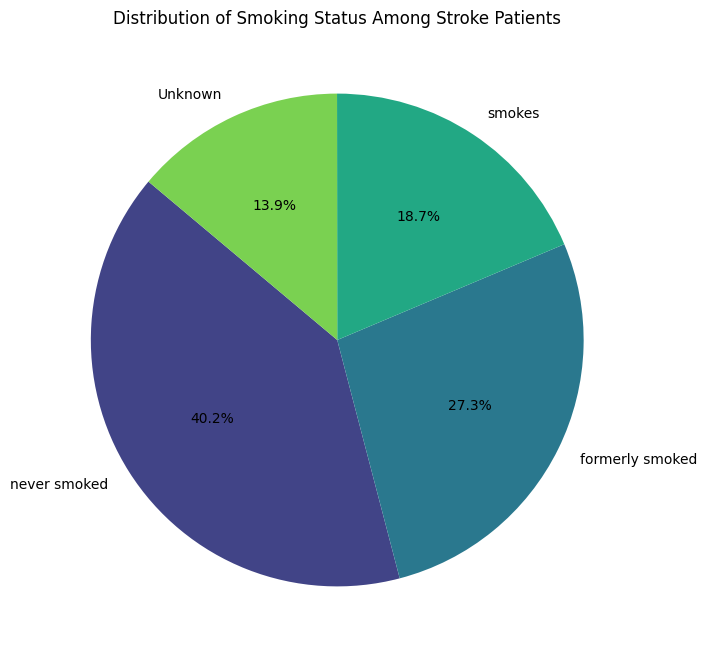

In [7]:
# Visualization 2: Pie Chart - Distribution of Smoking Status Among Stroke Patients
plt.figure(figsize=(8, 8))
plt.pie(smoking_status_counts, labels=smoking_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(smoking_status_counts)))
plt.title('Distribution of Smoking Status Among Stroke Patients')
plt.show()

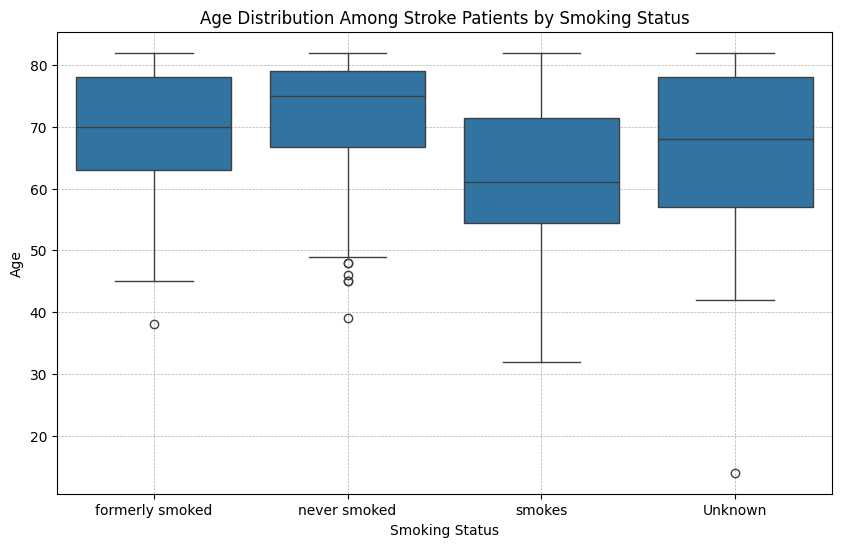

In [8]:
# Visualization 3: Box Plot - Age Distribution Among Stroke Patients by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_status', y='age', data=df_cleaned[df_cleaned['stroke'] == 1])
plt.title('Age Distribution Among Stroke Patients by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [9]:
# Adding a column that categorizes individuals by their estimated diabetic classifications, using the A1C test, based on their average glucose levels
df_with_diabetic_classifications = df.copy()
df_with_diabetic_classifications['diabetic_classification'] = 'normal'
df_with_diabetic_classifications.loc[df_with_diabetic_classifications['avg_glucose_level'] >= 140, 'diabetic_classification'] = 'diabetic'
df_with_diabetic_classifications.loc[(df_with_diabetic_classifications['avg_glucose_level'] < 140) & (df_with_diabetic_classifications['avg_glucose_level'] >= 117), 'diabetic_classification'] = 'prediabetic'

# Creating a dataframe that summarizes total number of stroke cases for smokers and non smokers of each diabetic classification
strokes_df2 = df_with_diabetic_classifications[df_with_diabetic_classifications['stroke'] == 1][['smoking_status', 'diabetic_classification']].value_counts().reset_index(name='stroke_cases').groupby(['smoking_status', 'diabetic_classification']).sum('stroke_cases').reset_index()
strokes_df2 = strokes_df2[strokes_df2['smoking_status'].isin(['smokes', 'never smoked'])]
strokes_df2

,smoking_status,diabetic_classification,stroke_cases
6,never smoked,diabetic,31
7,never smoked,normal,49
8,never smoked,prediabetic,4
9,smokes,diabetic,16
10,smokes,normal,21
11,smokes,prediabetic,2


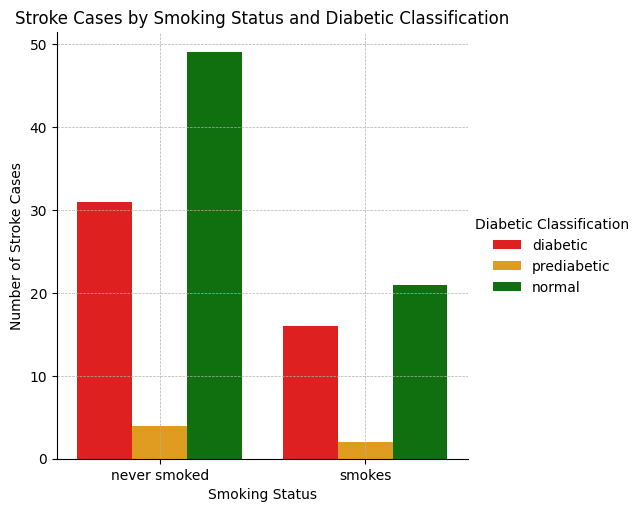

In [10]:
# Visualization 4: Bar Chart - Stroke Cases by Smoking Status and Diabetic Classification
g = sns.catplot(x='smoking_status', y='stroke_cases', hue='diabetic_classification', hue_order=['diabetic', 'prediabetic', 'normal'], palette=['red', 'orange', 'green'], kind='bar', data=strokes_df2)
plt.xlabel('Smoking Status')
plt.ylabel('Number of Stroke Cases')
plt.title('Stroke Cases by Smoking Status and Diabetic Classification')
g._legend.set_title('Diabetic Classification')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

## Note:

The diabetic classifications of the individuals are based on their average glucose levels, using the **A1C test** to determine their groups.

The A1C test is a blood test that measures an individual's average blood sugar levels over the past three months, specifically the percentage of red blood cells that have sugar-coated hemoglobin ("All about Your A1C").

Here are the following ranges of the A1C percentages for each diagnosis stated by the American Diabetes Association and the corresponding estimated average glucose, or eAG, levels:

**Normal**

A1C: < 5.7%

eAG: < 117 mg/dL

**Prediabetes**

A1C: 5.7-6.5%

eAG: 117-140 mg/DL

**Diabetes**

A1C: > 6.5%

eAG: > 140 mg/dL

## References

“A1C Looks Back.” *Understanding A1C Test | ADA*, https://diabetes.org/about-diabetes/a1c.

“All about Your A1C.” *Centers for Disease Control and Prevention*, Centers for Disease Control and Prevention, 30 Sept. 2022, www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html.

## Decision Tree for Classification

The classes of the data are those that experienced a stroke event (1) and those that did not (0)

In [11]:
print(len(df[df['stroke'] == 1])/len(df['stroke']))
print(1-len(df[df['stroke'] == 1])/len(df['stroke']))

0.04257486249745366
0.9574251375025463


The probability of having a stroke in the sample space of this dataset is 4.26% and the probability of not having a stroke in this dataset is 95.7%

In [12]:
# encode binary categorical data as 0s and 1s, but cannot for non-ordinal
# categorical variables with more than 2 factors
df['gender_factor'] = pd.factorize(df.gender)[0]
df['Residence_type_factor'] = pd.factorize(df.Residence_type)[0]
df['ever_married_factor'] = pd.factorize(df.ever_married)[0]
X = df.drop(['id','stroke','gender','Residence_type','work_type','smoking_status','ever_married'], axis = 1)
y = df['stroke']
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_factor,Residence_type_factor,ever_married_factor
0,67.0,0,1,228.69,36.6,0,0,0
2,80.0,0,1,105.92,32.5,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0
4,79.0,1,0,174.12,24.0,1,1,0
5,81.0,0,0,186.21,29.0,0,0,0


In [13]:
y[0:9]

0     1
2     1
3     1
4     1
5     1
6     1
7     1
9     1
10    1
Name: stroke, dtype: int64

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)

clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

In [15]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9185336048879837

In [16]:
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
accuracy

0.9185336048879837

Seems like we have some sort of fit!!

## Plot a Decision Tree

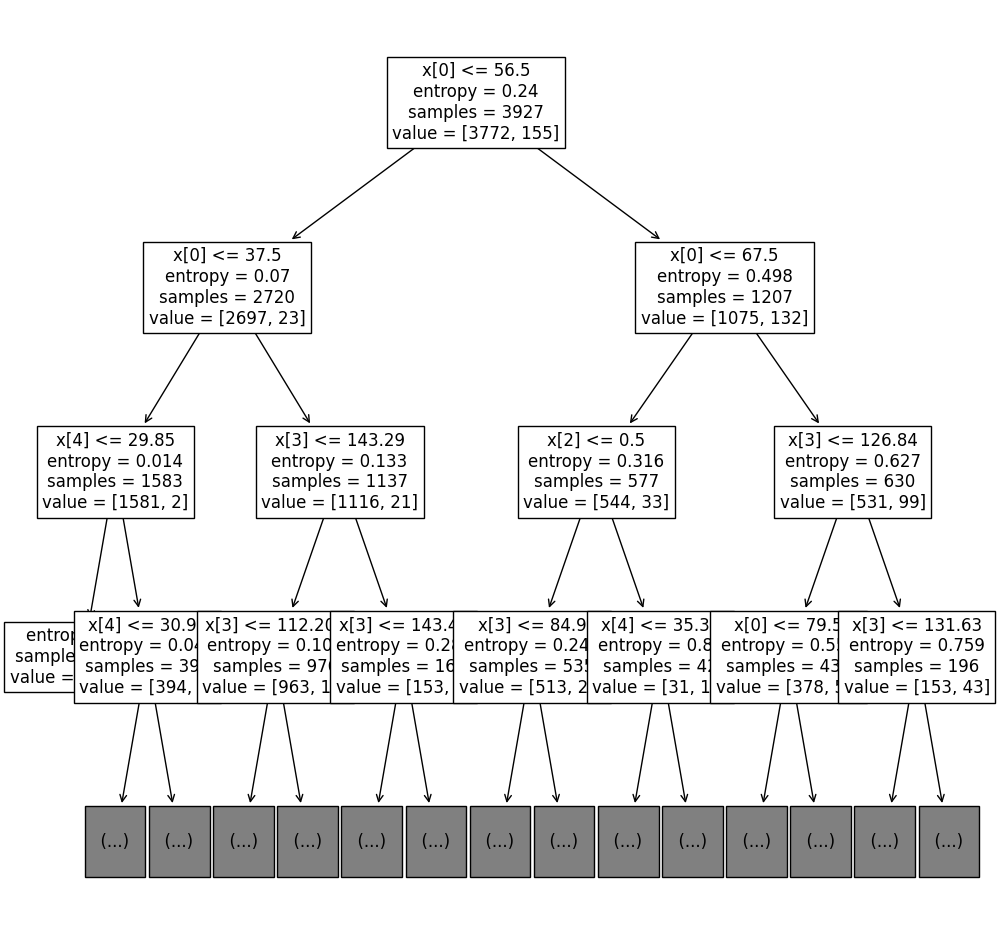

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12);

Interpret the result of the algorithm:

The algorithm splits the data by features x[0] (age), x[4] (bmi), x[3] (average glucose level), and x[2] (presence of heart disease), to obtain a classification which correctly predicts the outcome (occurrence of a stroke event) 91.9% of the time on the test data from this dataset.

In [18]:
# Cross-Validation
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=4,num_boost_round=10, metrics="error", as_pandas=True)
print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

Accuracy: 0.957628
